# Model training

In the notebook, the created feature dataset is used to train a xgboost model. The created model is evaluated

In [42]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('mode.chained_assignment', None)

In [43]:
data_file = 'processed_data.csv'

In [44]:
data = pd.read_csv(data_file, usecols=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
data

,v0,v1,v2,a0,a1,a2,brCh0,brCh1,brCh2,max(a),...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
0,9.644010,10.397889,2.641361,0.053849,-0.387826,0.094011,9.905377,1.179261,2.658509,0.094011,...,22.683259,7.561086,-14.047550,9.905377,1.179261,8.726116,13.743148,4.581049,7.197710,car
1,10.397889,2.641361,7.059883,-0.387826,0.094011,-0.032804,1.179261,2.658509,0.112307,0.094011,...,20.099133,6.699711,-2.559840,2.658509,0.112307,2.546203,3.950077,1.316692,0.065996,car
2,2.641361,7.059883,6.403810,0.094011,-0.032804,-0.054635,2.658509,0.112307,0.178176,0.094011,...,16.105054,5.368351,-4.039210,2.658509,0.112307,2.546203,2.948992,0.982997,0.925778,car
3,7.059883,6.403810,4.710134,-0.032804,-0.054635,0.016358,0.112307,0.178176,0.432528,0.016358,...,18.173827,6.057942,-10.288341,0.432528,0.112307,0.320221,0.723010,0.241003,0.131652,car
4,6.403810,4.710134,5.168146,-0.054635,0.016358,-0.068985,0.178176,0.432528,5.747349,0.016358,...,16.282090,5.427363,-7.606753,5.747349,0.178176,5.569173,6.358052,2.119351,2.623078,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98812,0.166792,0.281233,0.055597,0.057220,-0.112818,-0.006498,8.712678,8.712678,90.000000,0.057220,...,0.503622,0.167874,0.013422,90.000000,8.712678,81.287322,107.425355,35.808452,92.038905,bike
98813,0.281233,0.055597,0.042601,-0.112818,-0.006498,0.013721,8.712678,90.000000,52.539228,0.013721,...,0.379431,0.126477,0.018526,90.000000,8.712678,81.287322,151.251905,50.417302,272.233518,bike
98814,0.055597,0.042601,0.070042,-0.006498,0.013721,-0.035021,90.000000,52.539228,37.460772,0.013721,...,0.168241,0.056080,0.022360,90.000000,37.460772,52.539228,180.000000,60.000000,-868.958697,bike
98815,0.042601,0.070042,0.000000,0.013721,-0.035021,0.619666,52.539228,37.460772,116.654432,0.619666,...,0.112643,0.037548,-0.000109,116.654432,37.460772,79.193660,206.654432,68.884811,-1124.604808,bike


In [45]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [47]:
xgb = XGBClassifier(objective='multi:softprob',
              learning_rate=0.1, #so called `eta` value
              max_depth=14,
              min_child_weight=4,
              subsample= 0.5,
              n_estimators= 20,
              num_class= 5)

xgb.fit(X_train,
         y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=14, min_child_weight=4, missing=None, n_estimators=20,
              n_jobs=1, nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.5)

In [46]:
preds = xgb.predict(X_test)

print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds, labels=['car', 'walk', 'bike', 'train']))

AttributeError: module 'xgboost' has no attribute 'predict'

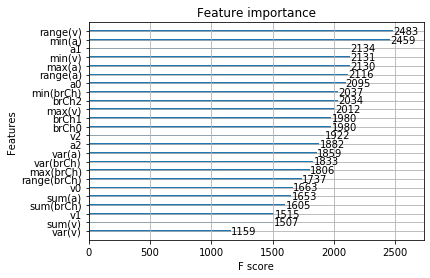

In [8]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)

In [11]:
import coremltools
coreml = coremltools.converters.xgboost.convert(xgb, 
                                                list(data.iloc[:,:-1].columns.values), 
                                                mode="classifier")
coreml.save('trans_mode.mlmodel')

In [12]:
import joblib
joblib.dump(xgb, "trans_mode.txt") 

['trans_mode.txt']

## TESTS

In [33]:
import joblib
xgb = joblib.load("trans_mode.txt")

In [34]:
data_raw = pd.read_csv(data_file, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

In [15]:
data_raw

,user,trans_trip,v0,v1,v2,a0,a1,a2,brCh0,brCh1,...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
0,106,0.0,9.644010,10.397889,2.641361,0.053849,-0.387826,0.094011,9.905377,1.179261,...,22.683259,7.561086,-14.047550,9.905377,1.179261,8.726116,13.743148,4.581049,7.197710,car
1,106,0.0,10.397889,2.641361,7.059883,-0.387826,0.094011,-0.032804,1.179261,2.658509,...,20.099133,6.699711,-2.559840,2.658509,0.112307,2.546203,3.950077,1.316692,0.065996,car
2,106,0.0,2.641361,7.059883,6.403810,0.094011,-0.032804,-0.054635,2.658509,0.112307,...,16.105054,5.368351,-4.039210,2.658509,0.112307,2.546203,2.948992,0.982997,0.925778,car
3,106,0.0,7.059883,6.403810,4.710134,-0.032804,-0.054635,0.016358,0.112307,0.178176,...,18.173827,6.057942,-10.288341,0.432528,0.112307,0.320221,0.723010,0.241003,0.131652,car
4,106,0.0,6.403810,4.710134,5.168146,-0.054635,0.016358,-0.068985,0.178176,0.432528,...,16.282090,5.427363,-7.606753,5.747349,0.178176,5.569173,6.358052,2.119351,2.623078,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98812,64,42.0,0.166792,0.281233,0.055597,0.057220,-0.112818,-0.006498,8.712678,8.712678,...,0.503622,0.167874,0.013422,90.000000,8.712678,81.287322,107.425355,35.808452,92.038905,bike
98813,64,42.0,0.281233,0.055597,0.042601,-0.112818,-0.006498,0.013721,8.712678,90.000000,...,0.379431,0.126477,0.018526,90.000000,8.712678,81.287322,151.251905,50.417302,272.233518,bike
98814,64,42.0,0.055597,0.042601,0.070042,-0.006498,0.013721,-0.035021,90.000000,52.539228,...,0.168241,0.056080,0.022360,90.000000,37.460772,52.539228,180.000000,60.000000,-868.958697,bike
98815,64,42.0,0.042601,0.070042,0.000000,0.013721,-0.035021,0.619666,52.539228,37.460772,...,0.112643,0.037548,-0.000109,116.654432,37.460772,79.193660,206.654432,68.884811,-1124.604808,bike


In [35]:
data_raw[data_raw['class'] == 'walk']

,user,trans_trip,v0,v1,v2,a0,a1,a2,brCh0,brCh1,...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
778,138,29.0,1.193330,1.179586,1.194284,-1.561856e-04,2.261244e-04,7.162216e-04,0.748247,2.771245,...,3.567200,1.189067,-0.073162,33.158982,0.748247,32.410735,36.678475,12.226158,34.939286,walk
779,138,29.0,1.179586,1.194284,1.303150,2.261244e-04,7.162216e-04,-1.708367e-02,2.771245,33.158982,...,3.677019,1.225673,-0.065339,56.840331,2.771245,54.069086,92.770559,30.923520,-33.958632,walk
780,138,29.0,1.194284,1.303150,1.081062,7.162216e-04,-1.708367e-02,-1.397274e-02,33.158982,56.840331,...,3.578495,1.192832,-0.109871,56.840331,6.238890,50.601441,96.238203,32.079401,-136.193312,walk
781,138,29.0,1.303150,1.081062,0.745716,-1.708367e-02,-1.397274e-02,1.188431e-02,56.840331,6.238890,...,3.129927,1.043309,-0.091279,56.840331,1.862874,54.977456,64.942095,21.647365,336.406805,walk
782,138,29.0,1.081062,0.745716,1.161667,-1.397274e-02,1.188431e-02,-4.765610e-03,6.238890,1.862874,...,2.988445,0.996148,0.079761,8.308283,1.862874,6.445408,16.410047,5.470016,-2.670051,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97622,64,12.0,0.170392,0.170392,0.170392,-5.419405e-10,5.419405e-10,-5.017570e-02,0.000000,0.000000,...,0.511176,0.170392,0.047119,52.541196,0.000000,52.541196,52.541196,17.513732,119.757334,walk
97623,64,12.0,0.170392,0.170392,0.070040,5.419405e-10,-5.017570e-02,1.584583e-02,0.000000,52.541196,...,0.410824,0.136941,0.017842,85.669004,0.000000,85.669004,138.210200,46.070067,42.514839,walk
97624,64,12.0,0.170392,0.070040,0.101732,-5.017570e-02,1.584583e-02,-2.956708e-02,52.541196,85.669004,...,0.342164,0.114055,0.031278,85.669004,33.127809,52.541195,171.338009,57.112670,-797.455546,walk
97625,64,12.0,0.070040,0.101732,0.042598,1.584583e-02,-2.956708e-02,-5.419406e-10,85.669004,33.127809,...,0.214371,0.071457,0.012803,85.669004,0.000000,85.669004,118.796814,39.598938,198.750213,walk


In [36]:
trip = data_raw[(data_raw['user'] == 64) & (data_raw['trans_trip'] == 12)]

In [37]:
trip

,user,trans_trip,v0,v1,v2,a0,a1,a2,brCh0,brCh1,...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
97514,64,12.0,1.747400,1.631199,1.972084,-5.810082e-02,1.704429e-01,2.935451e-01,18.104640,13.452983,...,5.350683,1.783561,-0.394828,18.104640,8.636481,9.468159,40.194103,13.398034,-49.571897,walk
97515,64,12.0,1.631199,1.972084,2.559175,1.704429e-01,2.935451e-01,2.232327e-02,13.452983,8.636481,...,6.162458,2.054153,-0.491581,18.784131,8.636481,10.147650,40.873594,13.624531,-47.311215,walk
97516,64,12.0,1.972084,2.559175,2.603821,2.935451e-01,2.232327e-02,6.327094e-01,8.636481,18.784131,...,7.135080,2.378360,-0.951674,18.784131,8.636481,10.147650,40.449181,13.483060,-39.057888,walk
97517,64,12.0,2.559175,2.603821,3.869240,2.232327e-02,6.327094e-01,5.875668e-01,18.784131,13.028570,...,9.032235,3.010745,-1.608614,18.784131,7.824881,10.959250,39.637581,13.212527,-45.223128,walk
97518,64,12.0,2.603821,3.869240,5.044373,6.327094e-01,5.875668e-01,-1.285596e+00,13.028570,7.824881,...,11.517434,3.839145,-2.722576,13.028570,6.299483,6.729087,27.152933,9.050978,-19.432056,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97622,64,12.0,0.170392,0.170392,0.170392,-5.419405e-10,5.419405e-10,-5.017570e-02,0.000000,0.000000,...,0.511176,0.170392,0.047119,52.541196,0.000000,52.541196,52.541196,17.513732,119.757334,walk
97623,64,12.0,0.170392,0.170392,0.070040,5.419405e-10,-5.017570e-02,1.584583e-02,0.000000,52.541196,...,0.410824,0.136941,0.017842,85.669004,0.000000,85.669004,138.210200,46.070067,42.514839,walk
97624,64,12.0,0.170392,0.070040,0.101732,-5.017570e-02,1.584583e-02,-2.956708e-02,52.541196,85.669004,...,0.342164,0.114055,0.031278,85.669004,33.127809,52.541195,171.338009,57.112670,-797.455546,walk
97625,64,12.0,0.070040,0.101732,0.042598,1.584583e-02,-2.956708e-02,-5.419406e-10,85.669004,33.127809,...,0.214371,0.071457,0.012803,85.669004,0.000000,85.669004,118.796814,39.598938,198.750213,walk


In [38]:
X_t, y_t = trip.iloc[:,2:-1],trip.iloc[:,-1]

In [39]:
X_t

,v0,v1,v2,a0,a1,a2,brCh0,brCh1,brCh2,max(a),...,range(v),sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh)
97514,1.747400,1.631199,1.972084,-5.810082e-02,1.704429e-01,2.935451e-01,18.104640,13.452983,8.636481,2.935451e-01,...,3.408857e-01,5.350683,1.783561,-0.394828,18.104640,8.636481,9.468159,40.194103,13.398034,-49.571897
97515,1.631199,1.972084,2.559175,1.704429e-01,2.935451e-01,2.232327e-02,13.452983,8.636481,18.784131,2.935451e-01,...,9.279758e-01,6.162458,2.054153,-0.491581,18.784131,8.636481,10.147650,40.873594,13.624531,-47.311215
97516,1.972084,2.559175,2.603821,2.935451e-01,2.232327e-02,6.327094e-01,8.636481,18.784131,13.028570,6.327094e-01,...,6.317367e-01,7.135080,2.378360,-0.951674,18.784131,8.636481,10.147650,40.449181,13.483060,-39.057888
97517,2.559175,2.603821,3.869240,2.232327e-02,6.327094e-01,5.875668e-01,18.784131,13.028570,7.824881,6.327094e-01,...,1.310065e+00,9.032235,3.010745,-1.608614,18.784131,7.824881,10.959250,39.637581,13.212527,-45.223128
97518,2.603821,3.869240,5.044373,6.327094e-01,5.875668e-01,-1.285596e+00,13.028570,7.824881,6.299483,6.327094e-01,...,2.440552e+00,11.517434,3.839145,-2.722576,13.028570,6.299483,6.729087,27.152933,9.050978,-19.432056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97622,0.170392,0.170392,0.170392,-5.419405e-10,5.419405e-10,-5.017570e-02,0.000000,0.000000,52.541196,5.419405e-10,...,1.083881e-09,0.511176,0.170392,0.047119,52.541196,0.000000,52.541196,52.541196,17.513732,119.757334
97623,0.170392,0.170392,0.070040,5.419405e-10,-5.017570e-02,1.584583e-02,0.000000,52.541196,85.669004,1.584583e-02,...,1.003514e-01,0.410824,0.136941,0.017842,85.669004,0.000000,85.669004,138.210200,46.070067,42.514839
97624,0.170392,0.070040,0.101732,-5.017570e-02,1.584583e-02,-2.956708e-02,52.541196,85.669004,33.127809,1.584583e-02,...,1.003514e-01,0.342164,0.114055,0.031278,85.669004,33.127809,52.541195,171.338009,57.112670,-797.455546
97625,0.070040,0.101732,0.042598,1.584583e-02,-2.956708e-02,-5.419406e-10,85.669004,33.127809,0.000000,1.584583e-02,...,5.913415e-02,0.214371,0.071457,0.012803,85.669004,0.000000,85.669004,118.796814,39.598938,198.750213


In [40]:
preds = xgb.predict(X_t)

In [41]:
preds

array(['walk', 'walk', 'bike', 'walk', 'walk', 'bike', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
      